In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

In [95]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Multiclass Diabetes Dataset.csv')
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [97]:
df.isnull().sum()

,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0


In [98]:
df['Class'].value_counts()
# keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes

,count
Class,
2,128
0,96
1,40


In [99]:
features_to_standardize = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
target_column = 'Class'
columns_to_keep = ['Gender']

In [100]:
X = df[features_to_standardize + columns_to_keep]
y = df[target_column]
print(y.shape)

(264,)


In [101]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[features_to_standardize] = scaler.fit_transform(X_train[features_to_standardize])
X_test_scaled = X_test.copy()
X_test_scaled[features_to_standardize] = scaler.transform(X_test[features_to_standardize])
print("\n--- Standardized Training Data ---")
print(X_train_scaled.head())
print("\n--- Standardized Test Data ---")
print(X_test_scaled.head())


--- Standardized Training Data ---
          AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
144  0.646119 -0.914107 -0.635568  1.863006  0.717338  2.290935 -0.608750   
73   0.067628  0.037991 -0.259256 -0.724157 -0.139201  0.345715  0.232417   
78  -1.282185 -0.589000 -0.176651 -1.033072  0.250135  0.196082 -0.608750   
252  0.549704  4.775262  1.273529  0.086745 -0.372803 -0.252815  0.232417   
182  1.031780 -0.194228 -0.314326  1.206562 -0.061334 -0.701712 -0.608750   

          LDL      VLDL       BMI  Gender  
144 -1.190579 -0.119924  1.272192       0  
73   0.625777 -0.149178 -1.107687       0  
78  -0.585127 -0.266191 -1.306010       1  
252 -0.484218 -0.207684  0.082252       1  
182  0.524869 -0.295444  1.272192       1  

--- Standardized Test Data ---
          AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
68  -0.510864 -0.333559 -0.305148 -1.033072 -0.917873 -0.701712  0.232417   
194  0.260458 -0.171006 -0.176651  0.048131  2.2746

# **Decision Tree**

In [103]:
model = DecisionTreeClassifier(
    criterion='gini',      # bisa juga 'entropy'
    max_depth=None,        # bisa atur kedalaman pohon
    random_state=42
    )
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [104]:
# Training dengan data training
training_model = DecisionTreeClassifier(random_state=42)
training_model.fit(X_train_scaled, y_train)

# Prediksi pada data training
# y_pred = training_model.predict(X_train_scaled)

# # Evaluasi di training set
# accuracy = accuracy_score(y_train, y_pred)
# conf_matrix = confusion_matrix(y_train, y_pred)
# f1 = f1_score(y_train, y_pred, average='weighted', zero_division=0)
# precision = precision_score(y_train, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_train, y_pred, average='weighted', zero_division=0)

# Evaluasi di test set
y_test_pred = training_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
print(f"\nModel: Decision Tree Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print("keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes")
print(conf_matrix)


Model: Decision Tree Classifier
Accuracy: 0.9811
Precision: 0.9832
Recall: 0.9811
F1 Score: 0.9815

Confusion Matrix:
keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes
[[18  0  0]
 [ 0  8  0]
 [ 0  1 26]]


In [105]:
# Buat DataFrame hasil evaluasi
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})
display(metrics_df)

cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual: Non Diabetes', 'Actual: Diduga Diabetes', 'Actual: Diabetes'],
                     columns=['Pred: Non Diabetes', 'Pred: Diduga Diabetes', 'Pred: Diabetes'])
display(cm_df)

,Metric,Value
0,Accuracy,0.981132
1,Precision,0.983229
2,Recall,0.981132
3,F1-Score,0.981509


,Pred: Non Diabetes,Pred: Diduga Diabetes,Pred: Diabetes
Actual: Non Diabetes,18,0,0
Actual: Diduga Diabetes,0,8,0
Actual: Diabetes,0,1,26


In [106]:
X_test['y_test_pred'] = y_test_pred
X_test['y_test'] = y_test
X_test

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,y_test_pred,y_test
68,44,4.4,56,4.20,3.4,1.3,1.3,1.5,0.6,21.0,0,0,0
194,52,5.1,70,7.00,7.5,1.7,1.2,1.8,0.6,30.0,1,2,2
82,40,6.3,79,4.90,4.3,0.8,0.8,1.8,1.2,22.0,0,0,0
247,60,10.0,194,7.10,4.6,1.6,0.8,1.8,1.7,26.0,1,2,2
109,39,3.0,38,6.40,4.7,1.3,1.1,3.1,0.6,22.0,0,1,1
118,50,4.8,62,5.90,5.3,1.3,1.0,3.7,0.6,19.0,1,1,1
113,50,5.0,74,6.20,2.0,0.8,0.6,1.0,0.4,25.0,1,1,1
178,53,4.7,53,8.60,6.2,1.7,1.1,4.3,0.8,30.0,0,2,2
9,33,3.3,53,4.00,4.0,1.1,0.9,2.7,1.0,21.0,0,0,0
251,53,7.5,230,11.60,9.1,1.5,1.4,2.1,7.0,27.0,1,2,2


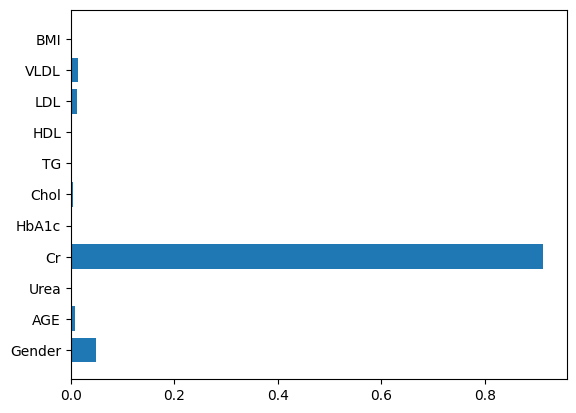

In [107]:
importance = training_model.feature_importances_
# importance

# Summarize feature importance
df_columnName = df.columns
df_feature_df_columnName = df_columnName.drop('Class')

# for i, v in enumerate(importance):
#     print(f'Feature: {df_feature_df_columnName[i]}, Score: {v:.5f}')
plt.barh(df_feature_df_columnName, importance)
plt.show()

In [108]:
# Training dan Prediksi
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

# Ubah semuanya jadi DataFrame/Series dengan index sejajar
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns).reset_index(drop=True)
y_test_df = pd.Series(y_test).reset_index(drop=True)
y_pred_df = pd.Series(y_test_pred).reset_index(drop=True)

# Gabungkan jadi satu tabel hasil
result_df = X_test_df.copy()
result_df["Actual"] = y_test_df
result_df["Predicted"] = y_pred_df

# Kolom pembanding benar/salah
result_df["Match"] = result_df["Actual"] == result_df["Predicted"]
display(result_df.head(10))

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,Actual,Predicted,Match
0,-0.510864,-0.333559,-0.305148,-1.033072,-0.917873,-0.701712,0.232417,-0.988762,-0.295444,-1.107687,0,0,0,True
1,0.260458,-0.171006,-0.176651,0.048131,2.274682,-0.402447,0.022126,-0.686036,-0.295444,0.677222,1,2,2,True
2,-0.896525,0.107657,-0.094046,-0.762771,-0.217069,-1.075793,-0.819042,-0.686036,-0.119924,-0.909364,0,0,0,True
3,1.031780,0.966868,0.961465,0.086745,0.016533,-0.477263,-0.819042,-0.686036,0.026342,-0.116071,1,2,2,True
4,-0.992940,-0.658666,-0.470358,-0.183555,0.094400,-0.701712,-0.188166,0.625777,-0.295444,-0.909364,0,1,1,True
5,0.067628,-0.240671,-0.250078,-0.376627,0.561603,-0.701712,-0.398458,1.231230,-0.295444,-1.504333,1,1,1,True
6,0.067628,-0.194228,-0.139937,-0.260784,-2.008014,-1.075793,-1.239626,-1.493305,-0.353950,-0.314394,1,1,1,True
7,0.356873,-0.263893,-0.332683,0.665961,1.262408,-0.402447,-0.188166,1.836682,-0.236937,0.677222,0,2,2,True
8,-1.571431,-0.589000,-0.332683,-1.110300,-0.450670,-0.851344,-0.608750,0.222143,-0.178431,-1.107687,0,0,0,True
9,0.356873,0.386320,1.291886,1.824392,3.520557,-0.552080,0.442709,-0.383310,1.576763,0.082252,1,2,2,True


# **Random Forest**

In [109]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [110]:
# Training dengan data training
training_model_rf = RandomForestClassifier(random_state=42)
training_model_rf.fit(X_train_scaled, y_train)

# # Prediksi pada data training
# y_pred = training_model.predict(X_train_scaled)

# # Evaluasi di training set
# accuracy = accuracy_score(y_train, y_pred)
# conf_matrix = confusion_matrix(y_train, y_pred)
# f1 = f1_score(y_train, y_pred, average='weighted', zero_division=0)
# precision = precision_score(y_train, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_train, y_pred, average='weighted', zero_division=0)

# Evaluasi di test set
y_test_pred = training_model_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
print(f"\nModel: Random Forest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print("keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes")
print(conf_matrix)


Model: Random Forest Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes
[[18  0  0]
 [ 0  8  0]
 [ 0  0 27]]


In [111]:
# Buat DataFrame hasil evaluasi
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})
display(metrics_df)

cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual: Non Diabetes', 'Actual: Diduga Diabetes', 'Actual: Diabetes'],
                     columns=['Pred: Non Diabetes', 'Pred: Diduga Diabetes', 'Pred: Diabetes'])
display(cm_df)

,Metric,Value
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1-Score,1.0


,Pred: Non Diabetes,Pred: Diduga Diabetes,Pred: Diabetes
Actual: Non Diabetes,18,0,0
Actual: Diduga Diabetes,0,8,0
Actual: Diabetes,0,0,27


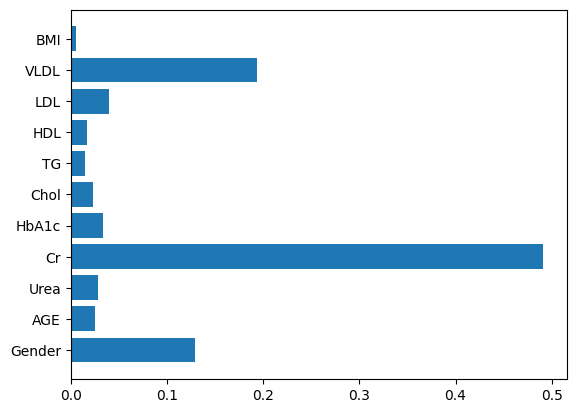

In [112]:
importance = training_model_rf.feature_importances_
# importance

# Summarize feature importance
df_columnName = df.columns
df_feature_df_columnName = df_columnName.drop('Class')

# for i, v in enumerate(importance):
#     print(f'Feature: {df_feature_df_columnName[i]}, Score: {v:.5f}')
plt.barh(df_feature_df_columnName, importance)
plt.show()

In [113]:
# Training dan Prediksi
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

# Ubah semuanya jadi DataFrame/Series dengan index sejajar
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns).reset_index(drop=True)
y_test_df = pd.Series(y_test).reset_index(drop=True)
y_pred_df = pd.Series(y_test_pred).reset_index(drop=True)

# Gabungkan jadi satu tabel hasil
result_df = X_test_df.copy()
result_df["Actual"] = y_test_df
result_df["Predicted"] = y_pred_df

# Kolom pembanding benar/salah
result_df["Match"] = result_df["Actual"] == result_df["Predicted"]
display(result_df.head(10))

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,Actual,Predicted,Match
0,-0.510864,-0.333559,-0.305148,-1.033072,-0.917873,-0.701712,0.232417,-0.988762,-0.295444,-1.107687,0,0,0,True
1,0.260458,-0.171006,-0.176651,0.048131,2.274682,-0.402447,0.022126,-0.686036,-0.295444,0.677222,1,2,2,True
2,-0.896525,0.107657,-0.094046,-0.762771,-0.217069,-1.075793,-0.819042,-0.686036,-0.119924,-0.909364,0,0,0,True
3,1.031780,0.966868,0.961465,0.086745,0.016533,-0.477263,-0.819042,-0.686036,0.026342,-0.116071,1,2,2,True
4,-0.992940,-0.658666,-0.470358,-0.183555,0.094400,-0.701712,-0.188166,0.625777,-0.295444,-0.909364,0,1,1,True
5,0.067628,-0.240671,-0.250078,-0.376627,0.561603,-0.701712,-0.398458,1.231230,-0.295444,-1.504333,1,1,1,True
6,0.067628,-0.194228,-0.139937,-0.260784,-2.008014,-1.075793,-1.239626,-1.493305,-0.353950,-0.314394,1,1,1,True
7,0.356873,-0.263893,-0.332683,0.665961,1.262408,-0.402447,-0.188166,1.836682,-0.236937,0.677222,0,2,2,True
8,-1.571431,-0.589000,-0.332683,-1.110300,-0.450670,-0.851344,-0.608750,0.222143,-0.178431,-1.107687,0,0,0,True
9,0.356873,0.386320,1.291886,1.824392,3.520557,-0.552080,0.442709,-0.383310,1.576763,0.082252,1,2,2,True


# **Support Vector Machine (SVM)**

In [114]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [115]:
# Training dengan data training
training_model_svm = SVC(random_state=42)
training_model_svm.fit(X_train_scaled, y_train)

# # Prediksi pada data training
# y_pred = training_model.predict(X_train_scaled)

# Evaluasi di training set
# accuracy = accuracy_score(y_train, y_pred)
# conf_matrix = confusion_matrix(y_train, y_pred)
# f1 = f1_score(y_train, y_pred, average='weighted', zero_division=0)
# precision = precision_score(y_train, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_train, y_pred, average='weighted', zero_division=0)

# Evaluasi di test set
y_test_pred = training_model_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
print(f"\nModel: SVM")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print("keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes")
print(conf_matrix)


Model: SVM
Accuracy: 0.9057
Precision: 0.9262
Recall: 0.9057
F1 Score: 0.8900

Confusion Matrix:
keterangan : 0 = non diabetes, 1 = diduga diabetes, 2 = diabetes
[[18  0  0]
 [ 5  3  0]
 [ 0  0 27]]


In [116]:
# Buat DataFrame hasil evaluasi
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})
display(metrics_df)
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual: Non Diabetes', 'Actual: Diduga Diabetes', 'Actual: Diabetes'],
                     columns=['Pred: Non Diabetes', 'Pred: Diduga Diabetes', 'Pred: Diabetes'])
display(cm_df)

,Metric,Value
0,Accuracy,0.905660
1,Precision,0.926169
2,Recall,0.905660
3,F1-Score,0.889972


,Pred: Non Diabetes,Pred: Diduga Diabetes,Pred: Diabetes
Actual: Non Diabetes,18,0,0
Actual: Diduga Diabetes,5,3,0
Actual: Diabetes,0,0,27


In [117]:
training_model_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [118]:
X_test['y_test_pred'] = y_test_pred
X_test['y_test'] = y_test
X_test.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,y_test_pred,y_test
68,44,4.4,56,4.2,3.4,1.3,1.3,1.5,0.6,21.0,0,0,0
194,52,5.1,70,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1,2,2
82,40,6.3,79,4.9,4.3,0.8,0.8,1.8,1.2,22.0,0,0,0
247,60,10.0,194,7.1,4.6,1.6,0.8,1.8,1.7,26.0,1,2,2
109,39,3.0,38,6.4,4.7,1.3,1.1,3.1,0.6,22.0,0,0,1


In [119]:
X_test

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,y_test_pred,y_test
68,44,4.4,56,4.20,3.4,1.3,1.3,1.5,0.6,21.0,0,0,0
194,52,5.1,70,7.00,7.5,1.7,1.2,1.8,0.6,30.0,1,2,2
82,40,6.3,79,4.90,4.3,0.8,0.8,1.8,1.2,22.0,0,0,0
247,60,10.0,194,7.10,4.6,1.6,0.8,1.8,1.7,26.0,1,2,2
109,39,3.0,38,6.40,4.7,1.3,1.1,3.1,0.6,22.0,0,0,1
118,50,4.8,62,5.90,5.3,1.3,1.0,3.7,0.6,19.0,1,0,1
113,50,5.0,74,6.20,2.0,0.8,0.6,1.0,0.4,25.0,1,1,1
178,53,4.7,53,8.60,6.2,1.7,1.1,4.3,0.8,30.0,0,2,2
9,33,3.3,53,4.00,4.0,1.1,0.9,2.7,1.0,21.0,0,0,0
251,53,7.5,230,11.60,9.1,1.5,1.4,2.1,7.0,27.0,1,2,2


In [120]:
# Training dan Prediksi
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [121]:
# Ubah semuanya jadi DataFrame/Series dengan index sejajar
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns).reset_index(drop=True)
y_test_df = pd.Series(y_test).reset_index(drop=True)
y_pred_df = pd.Series(y_test_pred).reset_index(drop=True)

# Gabungkan jadi satu tabel hasil
result_df = X_test_df.copy()
result_df["Actual"] = y_test_df
result_df["Predicted"] = y_pred_df

# Kolom pembanding benar/salah
result_df["Match"] = result_df["Actual"] == result_df["Predicted"]
display(result_df.head(10))

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,Actual,Predicted,Match
0,-0.510864,-0.333559,-0.305148,-1.033072,-0.917873,-0.701712,0.232417,-0.988762,-0.295444,-1.107687,0,0,0,True
1,0.260458,-0.171006,-0.176651,0.048131,2.274682,-0.402447,0.022126,-0.686036,-0.295444,0.677222,1,2,2,True
2,-0.896525,0.107657,-0.094046,-0.762771,-0.217069,-1.075793,-0.819042,-0.686036,-0.119924,-0.909364,0,0,0,True
3,1.031780,0.966868,0.961465,0.086745,0.016533,-0.477263,-0.819042,-0.686036,0.026342,-0.116071,1,2,2,True
4,-0.992940,-0.658666,-0.470358,-0.183555,0.094400,-0.701712,-0.188166,0.625777,-0.295444,-0.909364,0,1,0,False
5,0.067628,-0.240671,-0.250078,-0.376627,0.561603,-0.701712,-0.398458,1.231230,-0.295444,-1.504333,1,1,0,False
6,0.067628,-0.194228,-0.139937,-0.260784,-2.008014,-1.075793,-1.239626,-1.493305,-0.353950,-0.314394,1,1,1,True
7,0.356873,-0.263893,-0.332683,0.665961,1.262408,-0.402447,-0.188166,1.836682,-0.236937,0.677222,0,2,2,True
8,-1.571431,-0.589000,-0.332683,-1.110300,-0.450670,-0.851344,-0.608750,0.222143,-0.178431,-1.107687,0,0,0,True
9,0.356873,0.386320,1.291886,1.824392,3.520557,-0.552080,0.442709,-0.383310,1.576763,0.082252,1,2,2,True
